# **About Dataset**
SARS-CoV-2 virus contains proteins responsible for action and replication of the virus. The protein functions can be stopped by introducing drug molecules that are capable of blocking the protein. In other words, preparation of a drug involves finding molecules that can effectively bind to the protein i.e have a high binding affinity. In this task, you are provided with a dataset of drug molecules and their binding affinity towards SARS-CoronaVirus Main Proteaese(Mpro), one of the proteins in the target virus. The data has been generated using Protein-Ligand docking.


**Installing a package for mol2vec**

Mol2vec - an unsupervised machine learning approach to learn vector representations of molecular substructures
Here is a document 📄: https://mol2vec.readthedocs.io/en/latest/
Github : https://github.com/samoturk/mol2vec

In [1]:
pip install git+https://github.com/samoturk/mol2vec

  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-vfp6ohwq
  Running command git clone --filter=blob:none --quiet https://github.com/samoturk/mol2vec /tmp/pip-req-build-vfp6ohwq
  Resolved https://github.com/samoturk/mol2vec to commit 850d944d5f48a58e26ed0264332b5741f72555aa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00
  Created wheel for mol2vec: filename=mol2vec-0.1-py3-none-any.whl size=14016 sha256=db3cb77eb6fd6432468151b408c5c0e1c67abb9fb1e2b4f1bc823d5eaf33da00
  Stored in directory: /tmp/pip-ephem-wheel-cache-ieraubb1/wheels/b9/bd/e0/b6dd7c5e346247e8d6944e08ca1c262a908231747f4efa539d
Successfully built mol2vec


In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
traindata = pd.read_csv('/content/traindata.csv')
traindata.head()

,SMILES sequence,Binding Affinity
0,CCNC(C)C(NC)c1ccccc1,-18.0861
1,CONC(=O)c1cncnc1,-17.5783
2,CCNC1CCCN(Cc2ccsc2)C1,-20.3645
3,CC(NC(=O)CSCCN)c1ccccc1,-19.3144
4,CCC(CS)CN(C)c1ccccc1,-15.8451


In [12]:
traindata_on = traindata['Binding Affinity']
traindata.drop(columns='Binding Affinity')
traindata_on.head()

0   -18.0861
1   -17.5783
2   -20.3645
3   -19.3144
4   -15.8451
Name: Binding Affinity, dtype: float64

In [13]:
traindata.head()

,SMILES sequence,Binding Affinity
0,CCNC(C)C(NC)c1ccccc1,-18.0861
1,CONC(=O)c1cncnc1,-17.5783
2,CCNC1CCCN(Cc2ccsc2)C1,-20.3645
3,CC(NC(=O)CSCCN)c1ccccc1,-19.3144
4,CCC(CS)CN(C)c1ccccc1,-15.8451


In [14]:
testdata = pd.read_csv('/content/datatest.csv')
testdata_name = pd.read_csv('/content/datatest.csv')

In [15]:
testdata.head()

,SMILES sequence,Binding Affinity
0,Cc1ccc(C2CNCCN2C)cc1,NaN
1,CCOC(CO)c1ccccc1,NaN
2,CC(=O)Nc1cnn(C)n1,NaN
3,CCC(C)NCc1ncccn1,NaN
4,CC(C)=C1CC(N)C1,NaN


In [16]:
testdata_name.head()

,SMILES sequence,Binding Affinity
0,Cc1ccc(C2CNCCN2C)cc1,NaN
1,CCOC(CO)c1ccccc1,NaN
2,CC(=O)Nc1cnn(C)n1,NaN
3,CCC(C)NCc1ncccn1,NaN
4,CC(C)=C1CC(N)C1,NaN


In [18]:
testdata.drop(columns='Binding Affinity',inplace=True)
testdata_name.drop(columns='Binding Affinity',inplace=True)

In [20]:
testdata.head()

,SMILES sequence
0,Cc1ccc(C2CNCCN2C)cc1
1,CCOC(CO)c1ccccc1
2,CC(=O)Nc1cnn(C)n1
3,CCC(C)NCc1ncccn1
4,CC(C)=C1CC(N)C1


In [23]:
sample = pd.read_csv('/content/sample_submission.csv')
sample.head()

,SMILES sequence,Binding Affinity
0,Cc1ccc(C2CNCCN2C)cc1,-10.0
1,CCOC(CO)c1ccccc1,-10.0
2,CC(=O)Nc1cnn(C)n1,-10.0
3,CCC(C)NCc1ncccn1,-10.0
4,CC(C)=C1CC(N)C1,-10.0


### Import RDKIt Library

RDKIt is an open-source toolkit for cheminformatics, primarily used in the field of computational chemistry and drug discovery.

RDKIt Document: https://www.rdkit.org/docs/GettingStartedInPython.html

In [25]:
pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 34.8 MB/s eta 0:00:00


In [26]:
from rdkit import Chem

In [32]:
# Load your data into pandas DataFrames (replace 'data.csv' with your actual data file)
test = pd.read_csv('/content/datatest.csv')
train = pd.read_csv('/content/traindata.csv')

In [33]:
train['mol'] = train['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
test['mol'] = test['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))

In [34]:
print(type(train['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


In [35]:
print(type(test['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


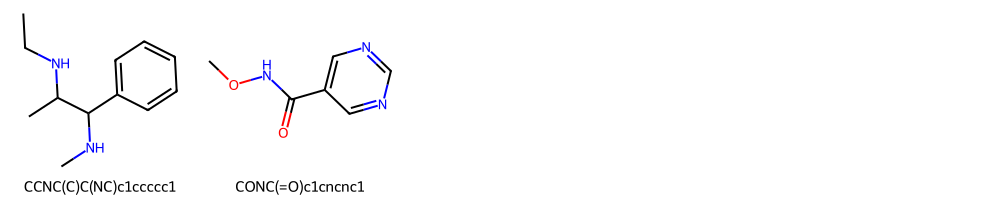

In [45]:
from rdkit.Chem import Draw
mols = train['mol'][:2]
#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(train['SMILES sequence'][:20].values))

In [46]:
train.head()

,SMILES sequence,Binding Affinity,mol
0,CCNC(C)C(NC)c1ccccc1,-18.0861,<rdkit.Chem.rdchem.Mol object at 0x79f2b6949e70>
1,CONC(=O)c1cncnc1,-17.5783,<rdkit.Chem.rdchem.Mol object at 0x79f2b6949850>
2,CCNC1CCCN(Cc2ccsc2)C1,-20.3645,<rdkit.Chem.rdchem.Mol object at 0x79f2b6949e00>
3,CC(NC(=O)CSCCN)c1ccccc1,-19.3144,<rdkit.Chem.rdchem.Mol object at 0x79f2b695e2d0>
4,CCC(CS)CN(C)c1ccccc1,-15.8451,<rdkit.Chem.rdchem.Mol object at 0x79f2b695e340>


In [49]:
test.head()

,SMILES sequence,Binding Affinity,mol
0,Cc1ccc(C2CNCCN2C)cc1,NaN,<rdkit.Chem.rdchem.Mol object at 0x79f2b64aa7a0>
1,CCOC(CO)c1ccccc1,NaN,<rdkit.Chem.rdchem.Mol object at 0x79f2b64aa810>
2,CC(=O)Nc1cnn(C)n1,NaN,<rdkit.Chem.rdchem.Mol object at 0x79f2b64aa880>
3,CCC(C)NCc1ncccn1,NaN,<rdkit.Chem.rdchem.Mol object at 0x79f2b64aa8f0>
4,CC(C)=C1CC(N)C1,NaN,<rdkit.Chem.rdchem.Mol object at 0x79f2b64aa960>


In [56]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('/content/model_300dim.pkl')

In [57]:
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

In [59]:
print('Molecular sentence:', mol2alt_sentence(train['mol'][1], radius=1))

Molecular sentence: ['2246728737', '3975275337', '864674487', '903112553', '847961216', '2204949651', '2246699815', '1054767590', '864942730', '1510328189', '3217380708', '2994748777', '3218693969', '3777168895', '2041434490', '3118255683', '3218693969', '725322217', '2041434490', '3118255683', '3218693969', '3777168895']


In [60]:
print('\nMolSentence object:', MolSentence(mol2alt_sentence(test['mol'][1], radius=1)))



MolSentence object: MolSentence with 24 words


In [61]:
print('\nDfVec object:',DfVec(sentences2vec(MolSentence(mol2alt_sentence(test['mol'][1], radius=1)), model, unseen='UNK')))


AttributeError: ignored

In [62]:
#Constructing sentences
train['sentence'] = train.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)


In [63]:
test['sentence'] = test.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)


In [65]:
# Assuming 'model' is your trained Word2Vec model from Gensim 4.0.0

# Convert sentences to vectors
vectors = []
for sentence in train['sentence']:
    sentence_vector = sentences2vec([sentence], model, unseen='UNK')[0]  # Using [0] to get the single result
    vectors.append(sentence_vector)

train['mol2vec'] = vectors

X = np.array([x.vec for x in train['mol2vec']])
y = train_aff.values


AttributeError: ignored

In [66]:
test['mol2vec'] = [DfVec(x) for x in sentences2vec(test['sentence'], model, unseen='UNK')]
test_value= np.array([x.vec for x in test['mol2vec']])
test_value.shape

AttributeError: ignored

In [69]:
from sklearn import svm

In [71]:
clf = svm.SVR(C=100)

In [72]:
clf.fit(X_train, y_train)

NameError: ignored

I am  Tired to solve problems ill be back